### Import the libaries

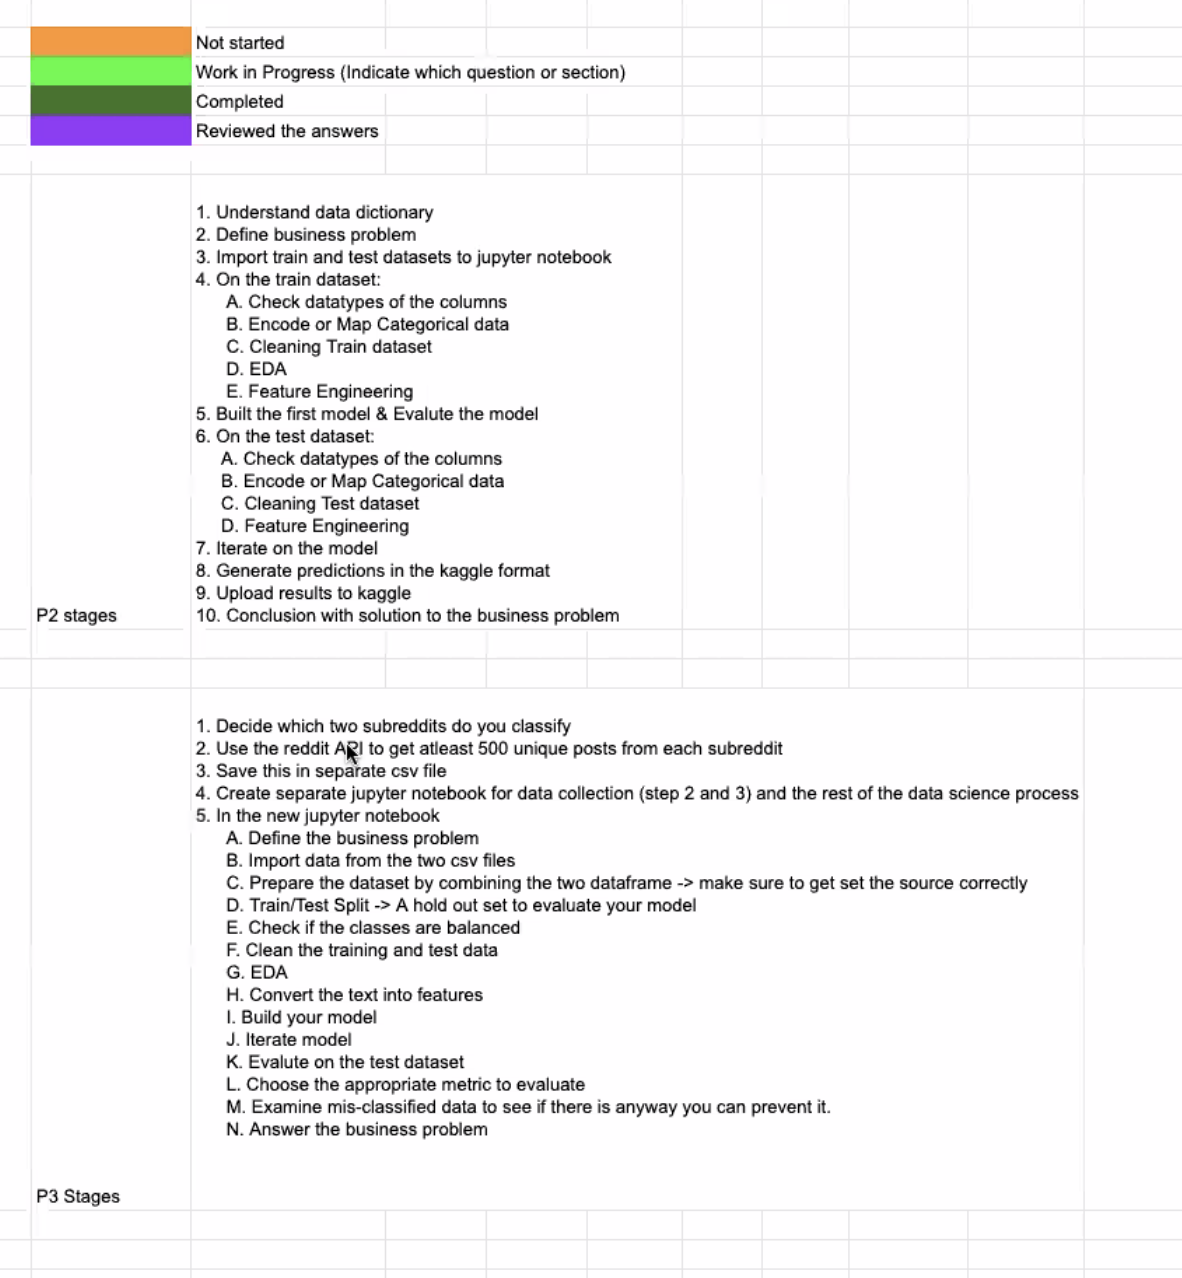

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords as st
import re


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Import the dataframes

In [3]:
al=pd.read_csv("alexa.csv")
gh=pd.read_csv("googlehome.csv")

In [4]:
al.shape

(2707, 111)

In [5]:
al.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,post_hint,preview,link_flair_template_id,author_cakeday,crosspost_parent_list,crosspost_parent,media_metadata,poll_data
0,NaN,amazonecho,"Post your requested features here, and vote on...",t2_6l4z3,False,NaN,0,False,Monthly Echo Feature Request Thread,[],r/amazonecho,False,6,feature,0,NaN,False,t3_gcbxdg,False,dark,0.90,NaN,public,28,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},Feature Request,False,28,NaN,True,self,False,NaN,[],{},NaN,True,NaN,1.588475e+09,text,6,NaN,NaN,text,self.amazonecho,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,confidence,NaN,NaN,False,True,False,False,False,[],[],False,False,False,False,Alexa's little helper,[],False,NaN,NaN,moderator,t5_34em3,NaN,NaN,NaN,gcbxdg,True,NaN,AutoModerator,NaN,61,False,all_ads,False,[],False,dark,/r/amazonecho/comments/gcbxdg/monthly_echo_fea...,all_ads,True,https://www.reddit.com/r/amazonecho/comments/g...,104588,1.588446e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,amazonecho,I can't use the speakers on my laptop so I con...,t2_mqsoe,False,NaN,0,False,Anyone know how to get Echo to stop announcing...,[],r/amazonecho,False,6,question,0,NaN,False,t3_g1413l,False,dark,0.89,NaN,public,72,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},Question,False,72,NaN,False,self,False,NaN,[],{},NaN,True,NaN,1.586893e+09,text,6,NaN,NaN,text,self.amazonecho,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,confidence,NaN,NaN,False,False,False,False,False,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_34em3,NaN,NaN,NaN,g1413l,True,NaN,FollyAdvice,NaN,15,True,all_ads,False,[],False,NaN,/r/amazonecho/comments/g1413l/anyone_know_how_...,all_ads,True,https://www.reddit.com/r/amazonecho/comments/g...,104588,1.586865e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,amazonecho,NaN,t2_47d39b3e,False,NaN,0,False,Alexa keeps doing this and won't respond to vo...,[],r/amazonecho,False,6,NaN,0,140.0,False,t3_gg23s4,False,dark,0.84,NaN,public,23,0,{},140.0,NaN,False,[],{'reddit_video': {'fallback_url': 'https://v.r...,True,False,NaN,{},Technical Issue,False,23,NaN,False,https://a.thumbs.redditmedia.com/zHAvp4gmWPmwy...,False,NaN,[],{},NaN,False,NaN,1.589002e+09,text,6,NaN,NaN,text,v.redd.it,False,NaN,NaN,confidence,NaN,NaN,False,False,False,False,False,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_34em3,NaN,NaN,NaN,gg23s4,True,NaN,ProxyOOF,NaN,8,True,all_ads,False,[],False,NaN,/r/amazonecho/comments/gg23s4/alexa_keeps_doin...,all_ads,False,https://v.redd.it/lirfbxavzlx41,104588,1.588973e+09,0,{'reddit_video': {'fallback_url': 'https://v.r...,True,hosted:video,{'images': [{'source': {'url': 'https://ext

In [6]:
print(al.columns)

Index(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved',
       'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext',
       ...
       'media', 'is_video', 'post_hint', 'preview', 'link_flair_template_id',
       'author_cakeday', 'crosspost_parent_list', 'crosspost_parent',
       'media_metadata', 'poll_data'],
      dtype='object', length=111)


In [7]:
al=al[['subreddit','selftext','title']]

In [8]:
al.shape

(2707, 3)

In [9]:
al.isnull().sum()

subreddit      0
selftext     252
title          0
dtype: int64

In [10]:
al['selftext'].fillna("",inplace=True)

In [11]:
al['subreddit'].unique()

array(['amazonecho'], dtype=object)

In [12]:
al=al.assign(text=al['selftext'].astype(str)+ " "+ al['title'].astype(str))

In [13]:
al.head()

,subreddit,selftext,title,text
0,amazonecho,"Post your requested features here, and vote on...",Monthly Echo Feature Request Thread,"Post your requested features here, and vote on..."
1,amazonecho,I can't use the speakers on my laptop so I con...,Anyone know how to get Echo to stop announcing...,I can't use the speakers on my laptop so I con...
2,amazonecho,,Alexa keeps doing this and won't respond to vo...,Alexa keeps doing this and won't respond to v...
3,amazonecho,I'm new to how Echo's work so maybe this is ob...,Help - Echo plays Italian Podcast when I ask i...,I'm new to how Echo's work so maybe this is ob...
4,amazonecho,"TL;DR Amazon Echo for older grandparents, reco...",Echo -make it work for Grandparents,"TL;DR Amazon Echo for older grandparents, reco..."


In [14]:
al.drop(['selftext','title'],axis=1,inplace=True)

In [15]:
al.drop_duplicates(inplace=True)

In [16]:
al.shape

(988, 2)

In [17]:
al

,subreddit,text
0,amazonecho,"Post your requested features here, and vote on..."
1,amazonecho,I can't use the speakers on my laptop so I con...
2,amazonecho,Alexa keeps doing this and won't respond to v...
3,amazonecho,I'm new to how Echo's work so maybe this is ob...
4,amazonecho,"TL;DR Amazon Echo for older grandparents, reco..."
5,amazonecho,"Hi,\n\nI'm losing my mind here. My echo has be..."
6,amazonecho,Just bought them a dot so I can send my mom me...
7,amazonecho,I'm looking to upgrade my echo dot. I have som...
8,amazonecho,Anyone else having this issue..... My Echo 2n...
9,amazonecho,"Hi, I'm trying to program a Lasko 2551 Fan to..."


### EDA - Generate a WordCloud for pre-processed Alexa file

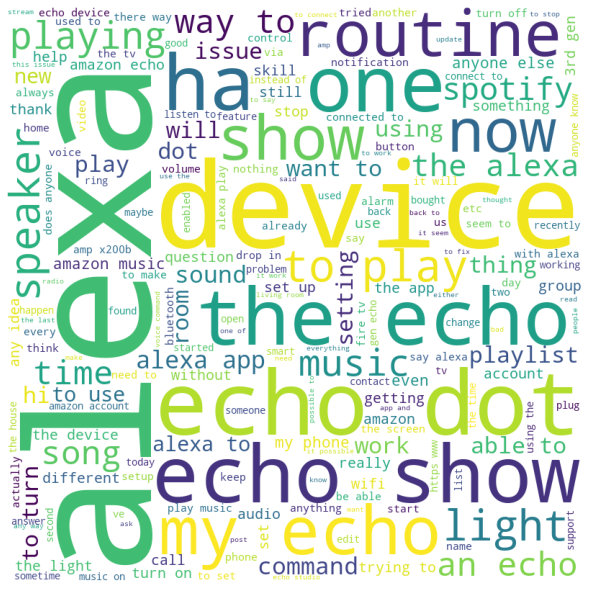

In [18]:
al_text=[i for i in al['text']]
comment_words = '' 
stopwords = set(STOPWORDS) 
  
for val in al_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Observation:
- Keywords like alexa, device, echo and dot are prominent and we will attempt to add them to the stop words when building our model

In [19]:
al['text'][986]

"Hello,\n\nI've had my echo devices (two of them) for a little over a year. Two weeks ago my reminders stopped giving me push notifications. I didn't change anything in my settings, didn't lose power or internet, and didn't change phones or devices.\n\nI've looked at all the settings in the Alexa App on my iPhone and they are all correct still, as well as my overall device settings for notifications are correct.\n\nIs there any fix for this? Push notifications for reminders stopped?"

In [20]:
gh.shape

(1326, 110)

In [21]:
gh=gh[['subreddit','selftext','title']]

In [22]:
gh.isnull().sum()

subreddit      0
selftext     242
title          0
dtype: int64

In [23]:
gh['selftext'].fillna("",inplace=True)

In [24]:
gh['subreddit'].unique()

array(['googlehome'], dtype=object)

In [25]:
gh=gh.assign(text=gh['selftext'].astype(str)+ " "+ gh['title'].astype(str))

In [26]:
gh.head()

,subreddit,selftext,title,text
0,googlehome,[\[FAQ - Frequently Asked Questions\]](https:/...,FAQ: Please read the subreddit FAQ before post...,[\[FAQ - Frequently Asked Questions\]](https:/...
1,googlehome,Do you want to liberate your Google so it can ...,My Google has Coronavirus! - Monthly Rants and...,Do you want to liberate your Google so it can ...
2,googlehome,,I think I found a way around it until it works...,I think I found a way around it until it work...
3,googlehome,"Hey Google, set a timer for 1 hour and 30 minu...",Oh my god how do you set a timer for 1 hour an...,"Hey Google, set a timer for 1 hour and 30 minu..."
4,googlehome,"It all started last night, when my Home Mini w...",Google Home Mini muted itself,"It all started last night, when my Home Mini w..."


In [27]:
gh.drop(['selftext','title'],axis=1,inplace=True)

In [28]:
gh.drop_duplicates(inplace=True)

In [29]:
gh.shape

(998, 2)

### EDA - Generate a WordCloud for pre-processed Googlehome file

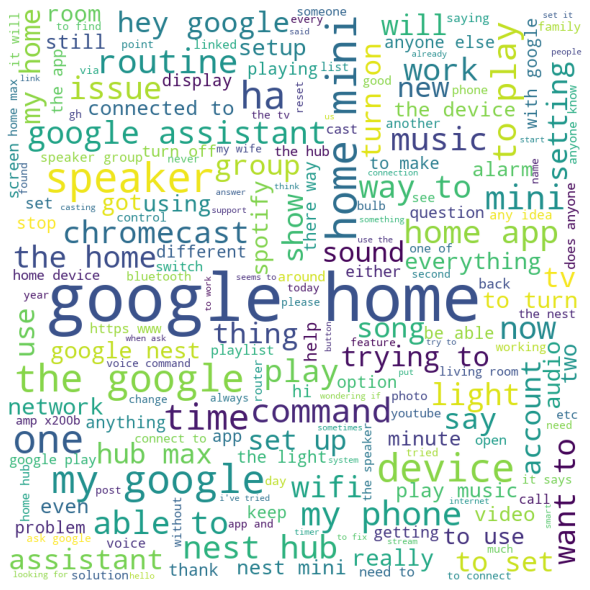

In [30]:
gh_text=[i for i in gh['text']]
comment_words = '' 
stopwords = set(STOPWORDS) 
  
for val in gh_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Observation:
- Keywords like google, home and mini are prominent and we will attempt to add them to the stop words when building our model

### Merging the 2 datasets

In [31]:
df=al.append(gh)

In [32]:
df.shape

(1986, 2)

In [33]:
df.columns=['label','message']

In [34]:
df.head()

,label,message
0,amazonecho,"Post your requested features here, and vote on..."
1,amazonecho,I can't use the speakers on my laptop so I con...
2,amazonecho,Alexa keeps doing this and won't respond to v...
3,amazonecho,I'm new to how Echo's work so maybe this is ob...
4,amazonecho,"TL;DR Amazon Echo for older grandparents, reco..."


### Label the target (GoogleHome =1 and Alexa =0)

In [35]:
df['label'] = df['label'].map({'amazonecho': 0, 'googlehome': 1})
df.head()

,label,message
0,0,"Post your requested features here, and vote on..."
1,0,I can't use the speakers on my laptop so I con...
2,0,Alexa keeps doing this and won't respond to v...
3,0,I'm new to how Echo's work so maybe this is ob...
4,0,"TL;DR Amazon Echo for older grandparents, reco..."


In [36]:
df.isnull().sum()

label      0
message    0
dtype: int64

### EDA - Generate a WordCloud for combined data file

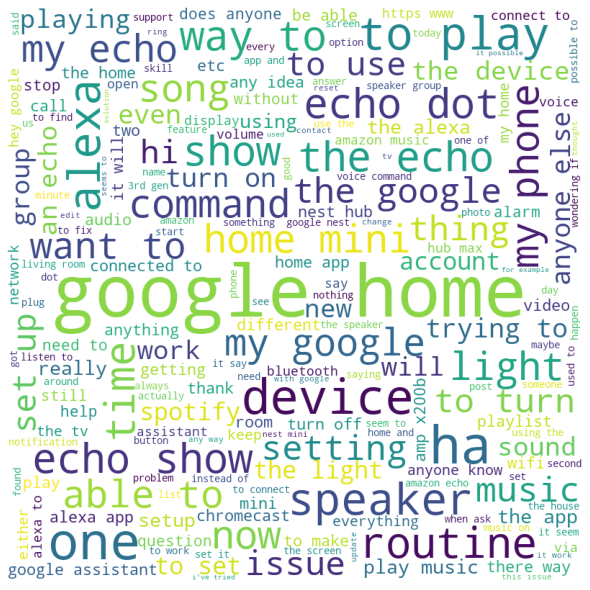

In [37]:
df_text=[i for i in df['message']]
comment_words = '' 
stopwords = set(STOPWORDS) 
  
for val in df_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Set up our data for modeling

In [38]:
X = df[['message']]
y = df['label']

In [39]:
y.value_counts(normalize=True)

1    0.502518
0    0.497482
Name: label, dtype: float64

In [40]:
y.value_counts()

1    998
0    988
Name: label, dtype: int64

### Baseline_score = 0.502

In [41]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42,
                                                    stratify=y)

In [42]:
p_stemmer=PorterStemmer()

### Adding new Stop Words to the original list  

In [43]:
st = nltk.corpus.stopwords.words('english')
#newStopWords = ['googl','chromecast','gh', 'google', 'home', 'mini','amazon','alexa', 'device', 'echo', 'dot','show']
newStopWords = ['googl','gh', 'google', 'home', 'alexa', 'echo', 'dot','amazon']
st.extend(newStopWords)

In [44]:
def review_to_words(raw_review):
  
    review_text = BeautifulSoup(raw_review).get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    words = letters_only.lower().split()
    stops = set(st)
    meaningful_words = [w for w in words if w not in stops]
    meaningful_words=[p_stemmer.stem(w) for w in words]
    return(" ".join(meaningful_words))

In [45]:
# Get the number of messages based on the dataframe size.
total_messages = X.shape[0]
print(f'There are {total_messages} messages.')

There are 1986 messages.


In [46]:
# Initialize an empty list to hold the clean messages.
clean_train_message = []
clean_test_message = []

print("Cleaning and parsing the training set messages...")

# Instantiate counter.
j = 0

# For every message in our training set...
for train_message in X_train['message']:
    
    # Convert messages to words, then append to clean_train_message.
    clean_train_message.append(review_to_words(train_message))
    
    # If the index is divisible by 100, print a message.
    if (j + 1) % 100 == 0:
        print(f'Message {j + 1} of {total_messages}.')
    
    j += 1

# Let's do the same for our testing set.
print("Cleaning and parsing the testing set messages...")

# For every message in our testing set...
for test_message in X_test['message']:
    
    # Convert messages to words, then append to clean_train_message.
    clean_test_message.append(review_to_words(test_message))
    
    # If the index is divisible by 100, print a message.
    if (j + 1) % 100 == 0:
        print(f'Message {j + 1} of {total_messages}.')
        
    j += 1

Cleaning and parsing the training set messages...
Message 100 of 1986.
Message 200 of 1986.
Message 300 of 1986.
Message 400 of 1986.
Message 500 of 1986.
Message 600 of 1986.
Message 700 of 1986.
Message 800 of 1986.
Message 900 of 1986.
Message 1000 of 1986.
Message 1100 of 1986.
Message 1200 of 1986.
Message 1300 of 1986.
Message 1400 of 1986.
Cleaning and parsing the testing set messages...
Message 1500 of 1986.
Message 1600 of 1986.
Message 1700 of 1986.
Message 1800 of 1986.
Message 1900 of 1986.


### Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer

TF-IDF is a score that tells us which words are important to one document, relative to all other documents. Words that occur often in one document but don't occur in many documents contain more predictive power.

In [47]:
# Instantiate the transformer.
tvec = TfidfVectorizer(
                    analyzer = "word",
                    ngram_range=(1, 4), #4-gram model      
                    tokenizer = None,
                    preprocessor = None,
                    stop_words = st,
                    max_features = 5000)


## 'ngram_range':[(1,1),(1,2),(2,2),(1,3),(2,3),(3,3)],



In [48]:
#Fitting the data
train_data_features = tvec.fit_transform(clean_train_message)

test_data_features = tvec.transform(clean_test_message)

In [49]:
print(train_data_features.shape)

(1489, 5000)


In [50]:
print(test_data_features.shape)

(497, 5000)


In [100]:
#vocab = cvec.get_feature_names()
vocab = tvec.get_feature_names()
print(vocab[:10])

['aac', 'ab', 'abil', 'abl', 'abl chang', 'abl control', 'abl drop', 'abl figur', 'abl find', 'abl get']


## Model 1: Naive Bayes Classifier

In [73]:
# Instantiate our model!
nb=MultinomialNB()

In [74]:
train_data_features.shape

(1489, 5000)

In [75]:
y_train.shape

(1489,)

In [76]:
# Fit our model!
nb.fit(train_data_features,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [77]:
# Score our model on the training set.
nb.score(train_data_features,y_train)

0.9442578912021491

In [78]:
# Score our model on the testing set.

nb.score(test_data_features,y_test)

0.7766599597585513

#### Observation:
- Model is overfitting and we will perform hyperparameter tuning.

### Hyperparameter tuning for Naive Bayes Classifier

In [79]:
nb_params = {
  'alpha': np.linspace(0.5, 1.5, 6),
  'fit_prior': [True, False],  
}

In [80]:
nb_gs= GridSearchCV(nb,param_grid=nb_params,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1,cv=5)

In [81]:
nb_gs.fit(train_data_features,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5]),
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [82]:
nb_gs.best_params_

{'alpha': 1.5, 'fit_prior': True}

In [83]:
# Score our model on the training set.
nb_gs.score(train_data_features,y_train)

0.9851768458579603

In [84]:
# Score our model on the testing set.
nb_gs.score(test_data_features,y_test)

0.8817651821862349

#### Observation:

- With tuning, we see a significant improvement in the accuracy of the model (post tuning: 0.881 vs pre-tuning 0.776)

In [85]:
# Generate our predictions!

nb_predictions = nb_gs.predict(test_data_features)

In [86]:
tn, fp, fn, tp = confusion_matrix(y_test, nb_predictions).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 199
False Positives: 48
False Negatives: 63
True Positives: 187


In [98]:
cm_nb=confusion_matrix(y_test,nb_predictions)
cm_nb=pd.DataFrame(cm_nb,columns=['pred AmazonEcho','pred GoogleHome'],index=['actual AmazonEcho','actual GoogleHome'])
cm_nb

,pred AmazonEcho,pred GoogleHome
actual AmazonEcho,199,48
actual GoogleHome,63,187


#### Observation:
- The model has 48 "False Positives" and 63 "False Negatives". 
- Type 1 error/False positives occurs when the model predicted that it's a GoogleHome post when it's actually an AmazonEcho post.
- Type 2 error/False Negative occurs when it's a 'GoogleHome' post but model classifies it as an 'AmazonEcho' post 

### Model Evaluation for Naive Bayes Classifier

In [91]:
nb_Accuracy = (tp + tn) / (tp + tn + fp + fn)
nb_Sensitivity = tp / (tp + fn)
nb_Specificity = tn / (tn + fp)
nb_Precision = tp / (tp + fp)

print("Accuracy : %s" %nb_Accuracy)
print("Sensitivity : %s" %nb_Sensitivity)
print("Specificity : %s" %nb_Specificity)
print("Precision : %s" %nb_Precision)

Accuracy : 0.7766599597585513
Sensitivity : 0.748
Specificity : 0.805668016194332
Precision : 0.7957446808510639


#### Observation:
- Sensitivity measures the proportion of actual positives that are correctly identified while Specificity measures the proportion of actual negatives that are correctly identified.
- Sensitivity and Specificity exist in a state of balance. 
- Increased specificity – inability to identify the googlehome posts correctly comes at the expense of reduced sensitivity (lesser false-positives than false-negatives).

- In the Naive Bayes classifier, sensitivity and specificity didn't differ much, meaning it is not able to perform the classification of the posts correctly.    

### ROC AUC for Naive Bayes Classifier

In [92]:
pred_proba = [i[1] for i in nb_gs.predict_proba(test_data_features)]

pred_df_nb = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

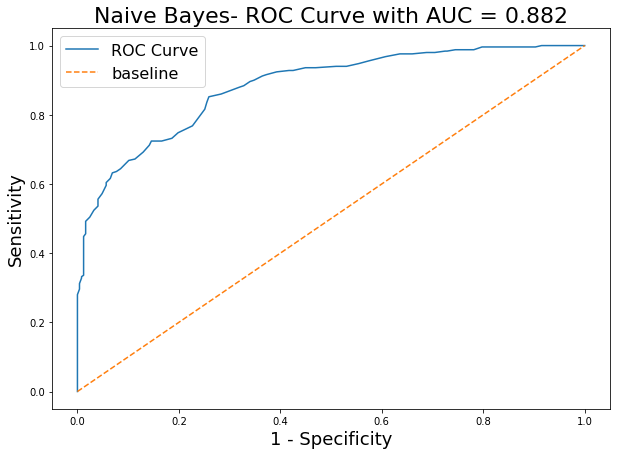

In [94]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df_nb, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df_nb, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'Naive Bayes- ROC Curve with AUC = {round(roc_auc_score(pred_df_nb["true_values"], pred_df_nb["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

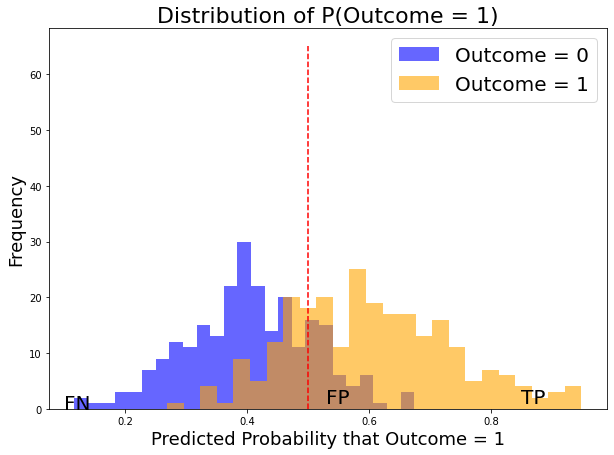

In [93]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df_nb[pred_df_nb['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Outcome = 0')
plt.hist(pred_df_nb[pred_df_nb['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x = 0.5,
           ymin = 0,
           ymax = 65,
           color = 'r',
           linestyle = '--')

# Add annotations for TN, FN, TP, FP.
plt.annotate(xy = (0.04, 15),
             s = 'TN',
             size = 20)

plt.annotate(xy = (0.1, 0),
             s = 'FN',
             size = 20)

plt.annotate(xy = (0.85, 1),
             s = 'TP',
             size = 20)

plt.annotate(xy = (0.53, 1),
             s = 'FP',
             size = 20)

# Label axes.
plt.title('Naive Bayes- Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20);

### Naive Bayes Classifier: Top 5 features with the highest weights

In [88]:
feature_names=np.array(tvec.get_feature_names())

In [89]:
coefs=nb.coef_[0]
top_three = np.argpartition(coefs, -5)[-5:]
print(feature_names[top_three])

['hub' 'nest' 'play' 'mini' 'thi']


### Naive Bayes Classifier: Bottom 5 features with the highest weights

In [90]:
bottom_ten = np.argpartition(coefs, 5)[:5]
print(feature_names[bottom_ten])

['fire tv stick remot' 'firestick' 'fire tv stick' 'fire tv cube' 'firetv']


## Model 2: Logistic Regression

In [52]:
# Instantiate logistic regression model.
lr = LogisticRegression()

# Fit model to training data.
lr.fit(train_data_features,y_train)

# Evaluate model on training data.
lr.score(train_data_features,y_train)

0.9509738079247817

In [53]:
print(f'Logistic Regression Intercept: {lr.intercept_}')
print(f'Logistic Regression Coefficient: {lr.coef_}')

Logistic Regression Intercept: [0.06263949]
Logistic Regression Coefficient: [[ 1.14491616e-01  3.18761832e-03 -1.90680744e-01 ... -3.54847584e-04
  -5.83167419e-01  1.06663947e-01]]


In [54]:
lr.score(test_data_features,y_test)

0.7987927565392354

In [55]:
lr_predictions = lr.predict(test_data_features)

In [56]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_predictions).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 207
False Positives: 40
False Negatives: 60
True Positives: 190


#### Observation:
- Model is overfitting and we will perform hyperparameter tuning.

### Hyperparameter tuning for Logistic Regression model

In [57]:
lr_params = {
    'penalty' : ['l1', 'l2','elasticnet'],
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
}

In [58]:
lr_gs= GridSearchCV(lr,param_grid=lr_params,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1,cv=5)

In [59]:
lr_gs.fit(train_data_features,y_train);

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    2.7s finished


In [60]:
lr_gs.best_estimator_

LogisticRegression(C=10, class_weight={0: 0.6, 1: 0.4}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
lr_gs.best_params_

{'C': 10, 'class_weight': {1: 0.4, 0: 0.6}, 'penalty': 'l2'}

In [62]:
lr_gs.score(train_data_features,y_train)

0.9994677664956303

In [63]:
lr_gs.score(test_data_features,y_test)

0.8861862348178138

#### Observation:

- With tuning, we see a significant improvement in the accuracy of the model (post tuning: 0.886 vs pre-tuning 0.798)

In [64]:
lr_gs_predictions = lr_gs.predict(test_data_features)

In [97]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_gs_predictions).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

cm_lr=confusion_matrix(y_test,lr_gs_predictions)
cm_lr=pd.DataFrame(cm_lr,columns=['pred AmazonEcho','pred GoogleHome'],index=['actual AmazonEcho','actual GoogleHome'])
cm_lr

True Negatives: 220
False Positives: 27
False Negatives: 81
True Positives: 169


,pred AmazonEcho,pred GoogleHome
actual AmazonEcho,220,27
actual GoogleHome,81,169


#### Observation:
- The model has 27 "False Positives" and 81 "False Negatives". 
- Type 1 error/False positives occurs when the model predicted that it's a GoogleHome post when it's actually an AmazonEcho post.
- Type 2 error/False Negative occurs when it's a 'GoogleHome' post but model classifies it as an 'AmazonEcho' post 

### Model Evaluation for Logistic Regression

In [66]:
lr_Accuracy = (tp + tn) / (tp + tn + fp + fn)
lr_Sensitivity = tp / (tp + fn)
lr_Specificity = tn / (tn + fp)
lr_Precision = tp / (tp + fp)

print("Accuracy : %s" %lr_Accuracy)
print("Sensitivity : %s" %lr_Sensitivity)
print("Specificity : %s" %lr_Specificity)
print("Precision : %s" %lr_Precision)

Accuracy : 0.7826961770623743
Sensitivity : 0.676
Specificity : 0.8906882591093117
Precision : 0.8622448979591837


#### Observation:
- Sensitivity measures the proportion of actual positives that are correctly identified while Specificity measures the proportion of actual negatives that are correctly identified.
- Sensitivity and Specificity exist in a state of balance. 
- Increased specificity – inability to identify the googlehome posts correctly comes at the expense of reduced sensitivity (lesser false-positives than false-negatives).

### ROC AUC for Logistic Regression

In [70]:
pred_proba = [i[1] for i in lr_gs.predict_proba(test_data_features)]

pred_df_ls = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

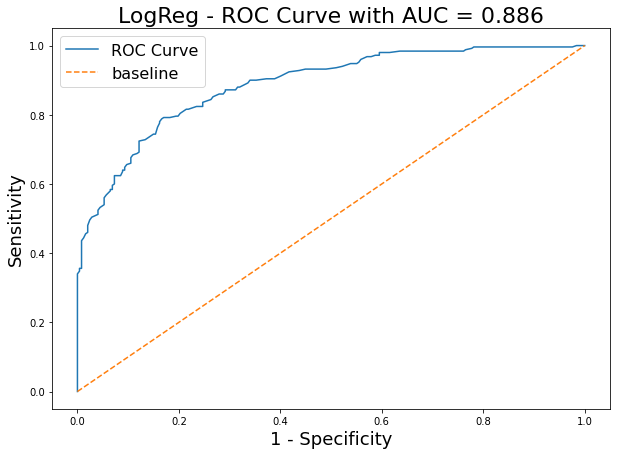

In [71]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df_ls, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df_ls, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'LogReg - ROC Curve with AUC = {round(roc_auc_score(pred_df_ls["true_values"], pred_df_ls["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

The more area under this blue curve is, the better separated our distributions are.

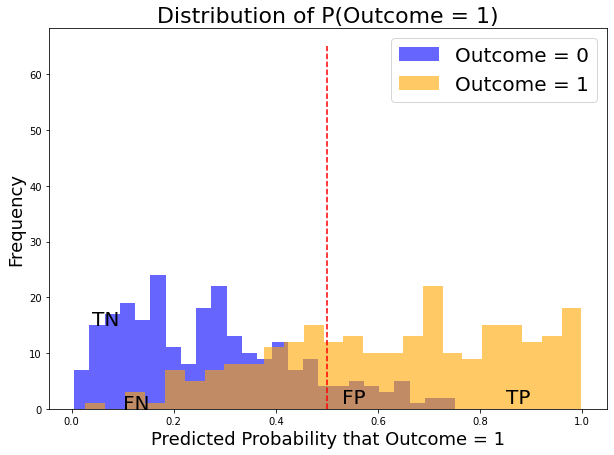

In [72]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df_ls[pred_df_ls['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Outcome = 0')
plt.hist(pred_df_ls[pred_df_ls['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x = 0.5,
           ymin = 0,
           ymax = 65,
           color = 'r',
           linestyle = '--')

# Add annotations for TN, FN, TP, FP.
plt.annotate(xy = (0.04, 15),
             s = 'TN',
             size = 20)

plt.annotate(xy = (0.1, 0),
             s = 'FN',
             size = 20)

plt.annotate(xy = (0.85, 1),
             s = 'TP',
             size = 20)

plt.annotate(xy = (0.53, 1),
             s = 'FP',
             size = 20)

# Label axes.
plt.title('LogReg-Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20);

### Logistic Regression: Top 5 features with the highest weights

In [67]:
feature_names=np.array(tvec.get_feature_names())

In [68]:
coefs=lr.coef_[0]
top_ten = np.argpartition(coefs, -5)[-5:]
print(feature_names[top_ten])

['max' 'hub' 'nest' 'assist' 'mini']


###  Logistic Regression: Bottom 5 features with the highest weights

In [69]:
bottom_ten = np.argpartition(coefs, 5)[:5]
print(feature_names[bottom_ten])

['skill' 'music' 'gen' 'show' 'studio']


The model evaluation is showing that Logistic Regression is a better model to be used here as it has a higher 